In [ ]:
import numpy as np
import pandas as pd

star = pd.read_csv('https://raw.githubusercontent.com/hype-usp/Grupos-de-estudos/main/Star%20Type%20Classification%20-%20NASA/Stars.csv')
star.corr()

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


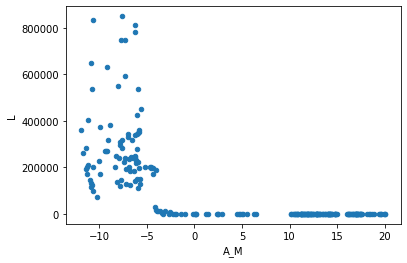

In [ ]:
star.plot.scatter(y='L', x='A_M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


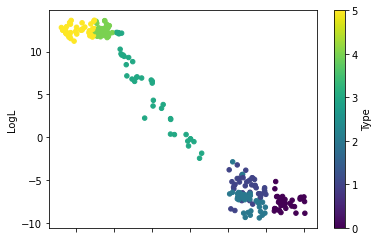

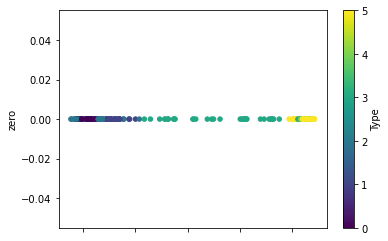

In [ ]:
from sklearn.decomposition import PCA

star['LogL'] = pd.DataFrame([None if n == 0 else np.log(n) for n in star['L']])
star['LogA_M'] = pd.DataFrame([None if n == 0 else np.log(n) for n in star['A_M']])

star.plot.scatter(x='A_M', y='LogL', c='Type', cmap='viridis')

X = star[['LogL', 'LogA_M']].fillna(0)
pca = PCA(n_components=1)
pcs_type = pd.merge(pd.DataFrame(pca.fit_transform(X), columns=['PC1']), star['Type'], right_index = True, left_index = True)
pcs_type['zero'] = np.zeros(len(pcs_type))
line = pcs_type.plot.scatter(x='PC1', y='zero', c='Type', cmap="viridis")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = star[['LogL', 'A_M']]
y = star['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100,2))+'%')
print("Precision:",str(round(metrics.precision_score(y_test, y_pred, average='macro')*100,2))+'%')
print("Recall:",str(round(metrics.recall_score(y_test, y_pred, average='macro')*100,2))+'%')

Accuracy: 95.83%
Precision: 96.3%
Recall: 94.44%


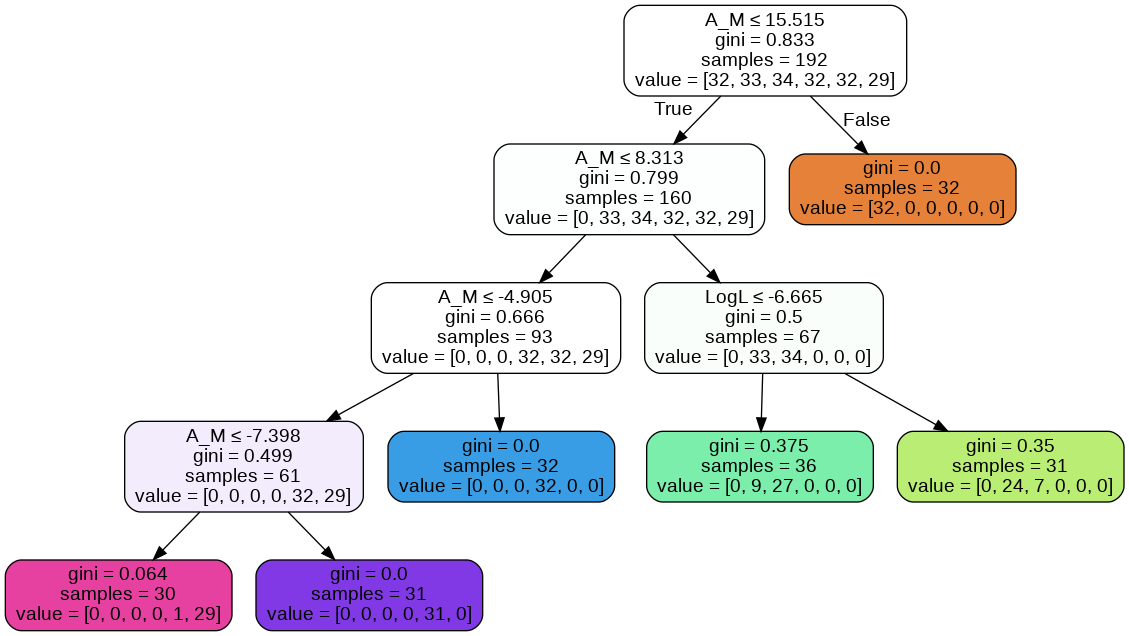

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['LogL', 'A_M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore.png')
Image(graph.create_png())

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = pcs_type['PC1']
y = pcs_type['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', gamma = 'auto')

clf.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
y_pred = clf.predict(np.array(X_test).reshape(-1, 1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",str(round(metrics.precision_score(y_test, y_pred, average='macro')*100,2))+'%')
print("Recall:",str(round(metrics.recall_score(y_test, y_pred, average='macro')*100,2))+'%')

Accuracy: 0.6041666666666666
Precision: 62.31%
Recall: 65.38%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = pcs_type['PC1']
y = pcs_type['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)

clf.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
y_pred = clf.predict(np.array(X_test).reshape(-1, 1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",str(round(metrics.precision_score(y_test, y_pred, average='macro')*100,2))+'%')
print("Recall:",str(round(metrics.recall_score(y_test, y_pred, average='macro')*100,2))+'%')

Accuracy: 0.6041666666666666
Precision: 52.49%
Recall: 59.09%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
